In [11]:
birds = read.csv("datasets/allometry/bird_allometry.csv")
head(birds)

              Genus_Species Sex brain_mass body_mass
1        Accipiter_gentilis   f   7.686143 1049.1571
2        Accipiter_gentilis   m   7.618500  678.2833
3           Accipiter_nisus   f   3.112797  252.1263
4           Accipiter_nisus   m   2.637390  136.1441
5        Accipiter_striatus   f   5.700000  520.0000
6 Acridotheres_cristatellus   m   2.310000  122.3800

In [12]:
males = birds[birds$Sex=="m",]
females = birds[birds$Sex=="f",]

In [13]:
mm = lm(log(brain_mass)~log(body_mass), data=males)
mf = lm(log(brain_mass)~log(body_mass), data=females)

cf = mm$coef
cf

   (Intercept) log(body_mass) 
    -1.9055981      0.5502056 

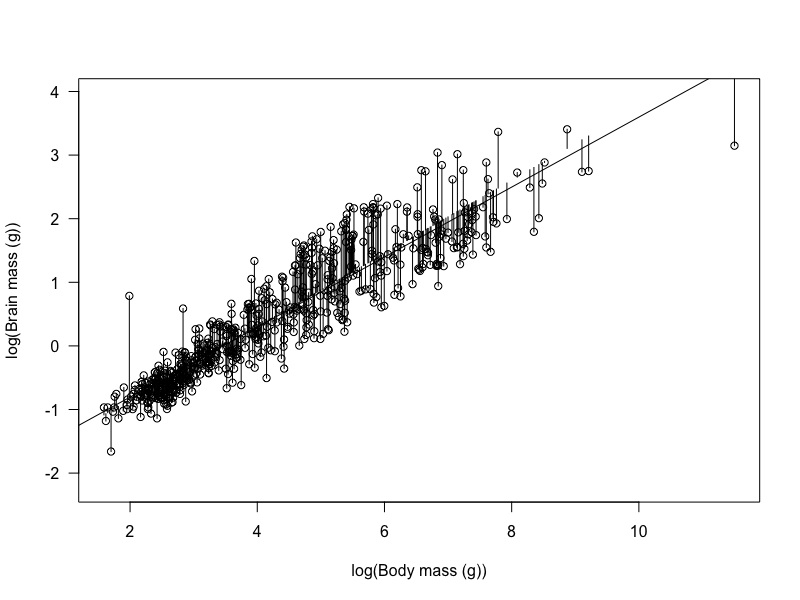

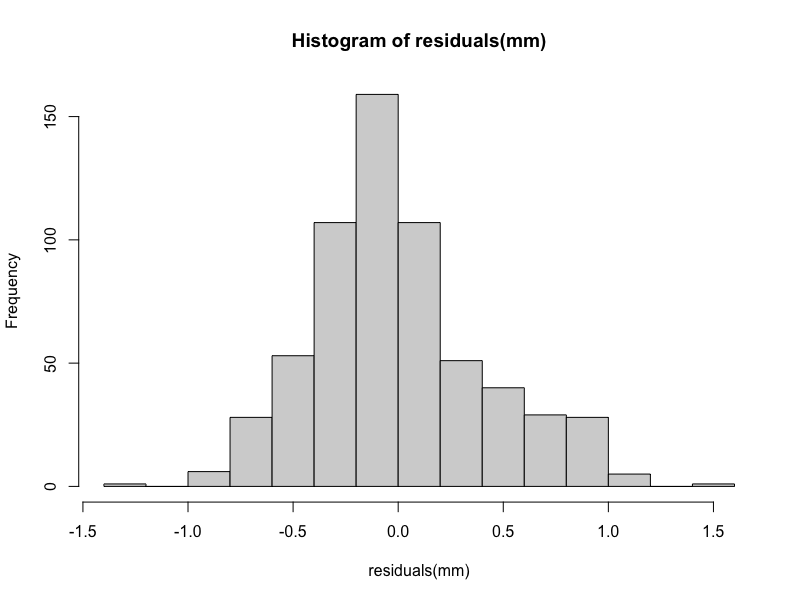

In [22]:
x <- log(males$body_mass)
y <- log(males$brain_mass)

predvals = cf[1] + cf[2]*x
par(mfrow=c(1,1))
plot(x, y, las=1, 
asp = 1,
xlab="log(Body mass (g))",
ylab="log(Brain mass (g))")
abline(mm)
segments(x, y, x, predvals)
hist(residuals(mm))

In [15]:
summary(mm)


Call:
lm(formula = log(brain_mass) ~ log(body_mass), data = males)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.27532 -0.24778 -0.06226  0.19858  1.59801 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -1.905598   0.045493  -41.89   <2e-16 ***
log(body_mass)  0.550206   0.009898   55.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4144 on 613 degrees of freedom
Multiple R-squared:  0.8345,	Adjusted R-squared:  0.8342 
F-statistic:  3090 on 1 and 613 DF,  p-value: < 2.2e-16


In [16]:
cf = mf$coef
cf

   (Intercept) log(body_mass) 
    -1.9984429      0.5752857 

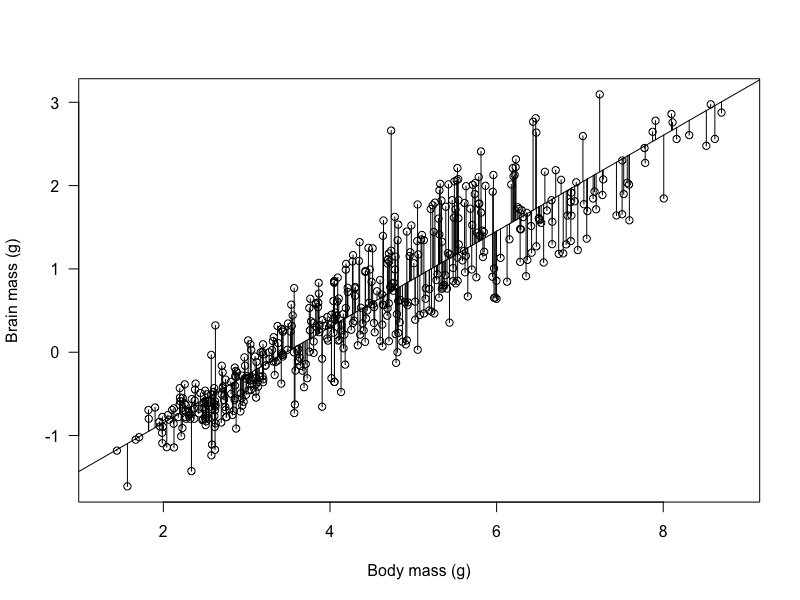

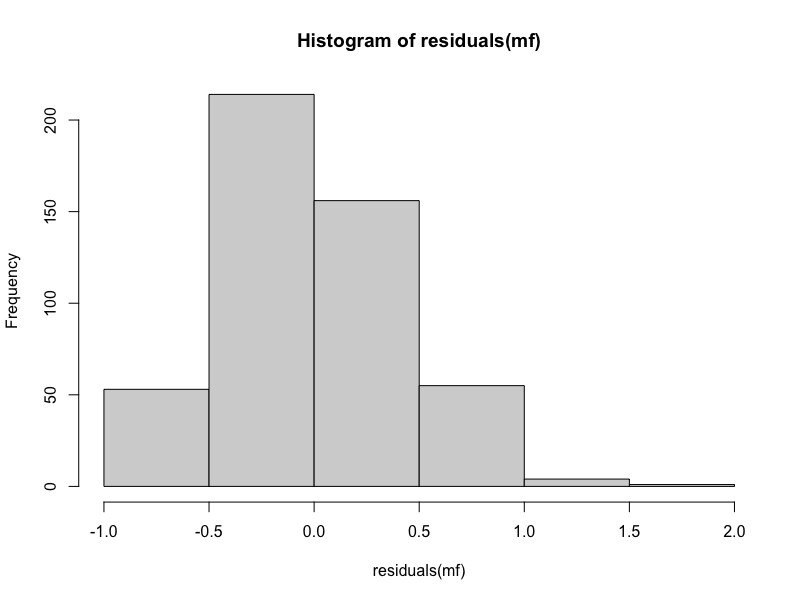

In [23]:
x <- log(females$body_mass)
y <- log(females$brain_mass)

predvals = cf[1] + cf[2]*x
par(mfrow=c(1,1))
plot(x, y, las=1, 
asp = 1,
xlab="Body mass (g)",
ylab="Brain mass (g)")
abline(mf)
segments(x, y, x, predvals)
hist(residuals(mf))